# SALARY PREDICTION ON BASIS OF EXPERIENCE

In [181]:
import pandas as pd
df=pd.read_csv('Salary_dataset.csv')
df

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0
5,5,3.0,56643.0
6,6,3.1,60151.0
7,7,3.3,54446.0
8,8,3.3,64446.0
9,9,3.8,57190.0


In [224]:
df_data=pd.DataFrame(df)
df_data.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [183]:
df_data.head(5)

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [184]:
df_data.shape

(30, 3)

In [185]:
df_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,30.0,14.500000,8.803408,0.0,7.25,14.5,21.75,29.0
YearsExperience,30.0,5.413333,2.837888,1.2,3.30,4.8,7.80,10.6
Salary,30.0,76004.000000,27414.429785,37732.0,56721.75,65238.0,100545.75,122392.0


In [186]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


In [187]:
df_data.isnull().sum()

Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64

In [188]:
df_data.dtypes.value_counts()

float64    2
int64      1
Name: count, dtype: int64

In [189]:
df_data.columns

Index(['Unnamed: 0', 'YearsExperience', 'Salary'], dtype='object')

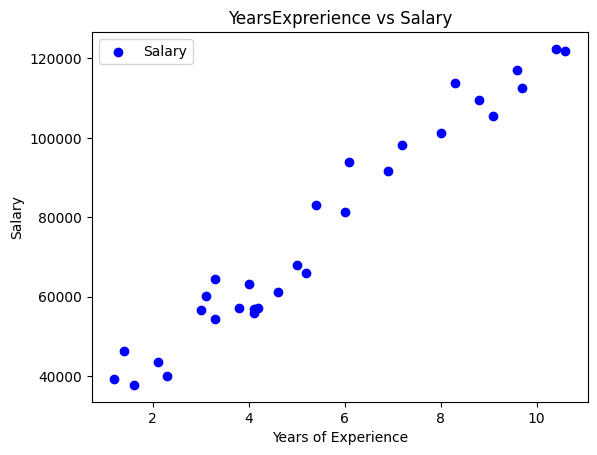

In [190]:
import matplotlib.pyplot as plt
plt.scatter(df_data['YearsExperience'],df_data['Salary'],color='blue')
plt.title('YearsExprerience vs Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend(['Salary'])
plt.show()


In [191]:
y=df_data['Salary']
y.head()

0    39344.0
1    46206.0
2    37732.0
3    43526.0
4    39892.0
Name: Salary, dtype: float64

In [192]:
X=df_data.drop('Salary',axis=1)
X.head()

,Unnamed: 0,YearsExperience
0,0,1.2
1,1,1.4
2,2,1.6
3,3,2.1
4,4,2.3


In [193]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test =train_test_split(
    X,y,
    test_size=0.2,
    random_state=42
)

print("Train set size:",X_train.shape)
print("Test set size:",X_test.shape)

Train set size: (24, 2)
Test set size: (6, 2)


In [194]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [195]:
lr.score(X_train,y_train)*100

96.65099743851464

In [196]:
lr.score(X_test,y_test)*100

89.13575982179493

In [197]:
data_new=X_train[:1]
lr.predict(data_new)

array([123856.93155287])

In [198]:
y=y_train[:1]
y

28    122392.0
Name: Salary, dtype: float64

In [199]:
# print("intercept:",lr.intercept_)
# print("coefficient:",lr.coef_)

In [200]:
y_pred=lr.predict(X_test)
print("Predicted salaries:",y_pred)


Predicted salaries: [116277.37185839  69892.77988271 102823.5044592   73005.91971544
  55382.99660129  60553.36038452]


In [201]:
y_test

27    112636.0
15     67939.0
23    113813.0
17     83089.0
8      64446.0
9      57190.0
Name: Salary, dtype: float64

In [202]:
from sklearn.metrics import mean_squared_error,r2_score,root_mean_squared_error
import numpy as np
mse=mean_squared_error(y_pred,y_test)
r2=r2_score(y_pred,y_test)*100
print("Mean Squared Error:",mse)
print("R2 Score:",r2)


Mean Squared Error: 55494098.1314222
R2 Score: 88.79469904611442


In [203]:
rmse=np.sqrt(mse)
print("Root Mean Squared Error:",rmse)

Root Mean Squared Error: 7449.436094861288


In [204]:
7449.436094861288*7449.436094861288

55494098.13142221

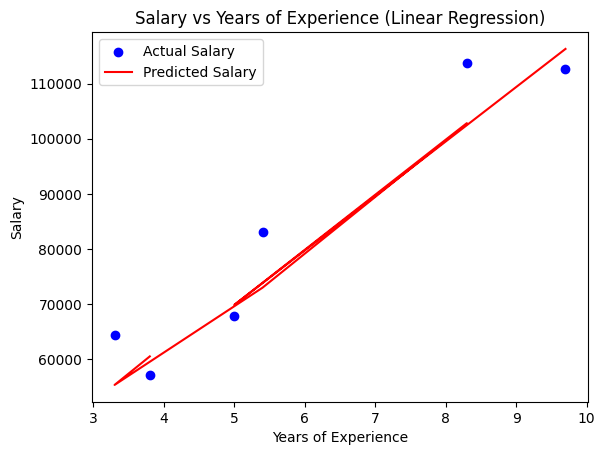

In [206]:
import matplotlib.pyplot as plt

# Ensure X_test and y_test have the same length
if len(X_test) == len(y_test):
	plt.scatter(X_test['YearsExperience'], y_test, color='blue', label='Actual Salary')
	plt.plot(X_test['YearsExperience'], y_pred, color='red', label='Predicted Salary')
	plt.title('Salary vs Years of Experience (Linear Regression)')
	plt.xlabel('Years of Experience')
	plt.ylabel('Salary')
	plt.legend()
	plt.show()
else:
	print("Error: X_test and y_test must have the same length")

In [222]:
new_experience = np.array([[5,4]])
predicted_salary = lr.predict(new_experience)
print("The Salary for 5 years of experience is:", predicted_salary[0])


The Salary for 5 years of experience is: 66373.06027527503


c:\Users\Chishty Computer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [214]:
print("number of features ",lr.n_features_in_)

number of features  2


In [223]:
print(new_experience.shape)

(1, 2)
